# **Exploratory Data Analysis for Machine Learning in Movies Dataset**
Final project of "IBM Machine Learning: Exploratory Data Analysis for Machine Learning" </br>
Written by Yohanes Setiawan

# **Main Objective**

Main objective of the analysis is doing an cleaning the dataset, doing an exploratory data analysis to get insights, and performing feature engineering to the dataset.</br>

# **Data Understanding**

The dataset was taken from Kaggle (https://www.kaggle.com/bharatnatrayn/movies-dataset-for-feature-extracion-prediction). The dataset has name “MOVIES DATASET FOR FEATURE EXTRACTION, PREDICTION”. According to the owner, the data is scrapped from IMDB Top Netflix Movies and TV Shows. This dataset contains 9 columns with further explanation:
* MOVIES : the movies/TV-shows name 
* YEAR : the year of the movies/TV shows
* GENRE : the genres of the movies/TV shows
* RATING : the movies/TV shows based on user’s assessment
* ONE-LINE : a brief description about the movies/TV shows
* STARS : the casts of the movies/TV shows
* VOTES : total audiences who give the rating
* RUNTIME : duration of the movies/TV shows
* GROSS : total amount earned in the worldwide


# **Load Data**

In [ ]:
import os
import pandas as pd
import numpy as np

In [ ]:
movies = pd.read_csv("movies.csv", sep=",")

In [ ]:
movies.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


## Dataset Information

In [ ]:
# Number of rows
print("Total rows: ", movies.shape[0]) #take the rows only

# Column names
print("Column names: ", movies.columns.tolist())

# Data types for each column
print("Datatype of each column: ")
print(movies.dtypes)

Total rows:  9999
Column names:  ['MOVIES', 'YEAR', 'GENRE', 'RATING', 'ONE-LINE', 'STARS', 'VOTES', 'RunTime', 'Gross']
Datatype of each column: 
MOVIES       object
YEAR         object
GENRE        object
RATING      float64
ONE-LINE     object
STARS        object
VOTES        object
RunTime     float64
Gross        object
dtype: object


#**Data Cleaning**

## Missing Values

In [ ]:
print("Non Missing Value from the Dataset for each column: ")
print(movies.notnull().sum())

Non Missing Value from the Dataset for each column: 
MOVIES      9999
YEAR        9355
GENRE       9919
RATING      8179
ONE-LINE    9999
STARS       9999
VOTES       8179
RunTime     7041
Gross        460
dtype: int64


In [ ]:
print("Missing Value from the Dataset for each column: ")
print(movies.isnull().sum())

Missing Value from the Dataset for each column: 
MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64


* “Gross” has 9539/9999 = 95.4% missing values in their rows. 
* Thus, I move the “Gross” column into another variable to keep it safe for the future
* Then, I drop the column from the main dataframe.

In [ ]:
movies.groupby("Gross").count()

In [ ]:
#Saving not null "Gross" feature to another variable
mov_gross = movies[movies["Gross"].notnull()]
mov_gross.head()

In [ ]:
#Drop Gross from main "movies" pandas
movies.drop(["Gross"], axis=1, inplace=True) #axis=1 means column indexes

In [ ]:
movies.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN


* I still have problems with missing values in “YEAR”, “RATING”, “VOTES”, and “RunTime”. 
* For ‘YEAR”, I let the missing values for further feature engineering step (as it’s in “string”) and I fill it with “Unknown” to be processed later. 
* So, I focus on handling “RATING”, “VOTES”, and “RunTime”. I can estimate the value by mean or their minimum or maximum value. 
* However, as we knew that movie is an unexpected thing to be estimated, thus I choose to fill the missing values  “0”. 
* Then, all of the missing values from “RATING”, “VOTES”, and “RunTime” are to be zero 

In [ ]:
#Saving the null "Genre" feature to another variable
null_genre = movies[movies["GENRE"].isnull()]
null_genre.head()

In [ ]:
#Drop rows that have null GENRE from main "movies" pandas
movies = movies[movies['GENRE'].notna()]

In [ ]:
movies.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN


In [ ]:
print("Updated Missing Value from the Dataset for each column: ")
print(movies.isnull().sum())

Updated Missing Value from the Dataset for each column: 
MOVIES         0
YEAR         603
GENRE          0
RATING      1751
ONE-LINE       0
STARS          0
VOTES       1751
RunTime     2887
dtype: int64


In [ ]:
#Fill the missing value in RATING with "0"
movies["RATING"] = movies["RATING"].fillna(0)

In [ ]:
print("Updated Missing Value from the Dataset for each column: ")
print(movies.isnull().sum())

Updated Missing Value from the Dataset for each column: 
MOVIES         0
YEAR         603
GENRE          0
RATING         0
ONE-LINE       0
STARS          0
VOTES       1751
RunTime     2887
dtype: int64


In [ ]:
movies['RATING'].head(40)

In [ ]:
movies.loc[movies["VOTES"].isnull()]

In [ ]:
movies.loc[movies["VOTES"].isnull()].isnull().sum()

MOVIES         0
YEAR         603
GENRE          0
RATING         0
ONE-LINE       0
STARS          0
VOTES       1751
RunTime     1498
dtype: int64

In [ ]:
movies.loc[movies["RunTime"].isnull()]

In [ ]:
movies.loc[movies["RunTime"].isnull()].isnull().sum()

MOVIES         0
YEAR         576
GENRE          0
RATING         0
ONE-LINE       0
STARS          0
VOTES       1498
RunTime     2887
dtype: int64

In [ ]:
#Fill the missing value in RATING with "0"
movies[["RATING","VOTES","RunTime"]] = movies[["RATING","VOTES","RunTime"]].fillna(0)

In [ ]:
print("Updated Missing Value from the Dataset for each column: ")
print(movies.isnull().sum())

Updated Missing Value from the Dataset for each column: 
MOVIES        0
YEAR        603
GENRE         0
RATING        0
ONE-LINE      0
STARS         0
VOTES         0
RunTime       0
dtype: int64


In [ ]:
#Fill the missing value in RATING with "0"
movies["YEAR"] = movies["YEAR"].fillna("Unknown")

In [ ]:
print("Updated Missing Value from the Dataset for each column: ")
print(movies.isnull().sum())

Updated Missing Value from the Dataset for each column: 
MOVIES      0
YEAR        0
GENRE       0
RATING      0
ONE-LINE    0
STARS       0
VOTES       0
RunTime     0
dtype: int64


In [ ]:
movies.head(20)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
4,Army of Thieves,(2021),"\nAction, Crime, Horror",0.0,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,0,0.0
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0
6,The Last Letter from Your Lover,(2021),"\nDrama, Romance",6.8,\nA pair of interwoven stories set in the past...,\n Director:\nAugustine Frizzell\n| \n S...,"5,283",110.0
7,Dexter,(2006–2013),"\nCrime, Drama, Mystery",8.6,"\nBy day, mild-mannered Dexter is a blood-spat...","\n \n Stars:\nMichael C. Hall, \...","665,387",53.0
8,Never Have I Ever,(2020– ),\nComedy,7.9,\nThe complicated life of a modern-day first g...,\n \n Stars:\nMaitreyi Ramakrish...,"34,530",30.0
9,Virgin River,(2019– ),"\nDrama, Romance",7.4,"\nSeeking a fresh start, nurse practitioner Me...",\n \n Stars:\nAlexandra Breckenr...,"27,279",44.0


In [ ]:
movies.tail(20)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
9979,Never Have I Ever,(2020– ),\nComedy,8.8,\nAs Paxton's mixed messages have Devi questio...,\n Director:\nLang Fisher\n| \n Stars:\n...,433,0.0
9980,1899,(2022– ),"\nDrama, History, Horror",0.0,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,0,0.0
9981,1899,(2022– ),"\nDrama, History, Horror",0.0,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,0,0.0
9982,1899,(2022– ),"\nDrama, History, Horror",0.0,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,0,0.0
9983,The Last Kingdom,(2015– ),"\nAction, Drama, History",0.0,\nAdd a Plot\n,\n Director:\nPaul Wilmshurst\n| \n Star...,0,0.0
9984,The Last Kingdom,(2015– ),"\nAction, Drama, History",0.0,\nAdd a Plot\n,\n Director:\nPaul Wilmshurst\n| \n Star...,0,0.0
9985,The Last Kingdom,(2015– ),"\nAction, Drama, History",0.0,\nAdd a Plot\n,\n Director:\nPaul Wilmshurst\n| \n Star...,0,0.0
9986,The Last Kingdom,(2015– ),"\nAction, Drama, History",0.0,\nAdd a Plot\n,\n,0,0.0
9987,The Last Kingdom,(2015– ),"\nAction, Drama, History",0.0,\nAdd a Plot\n,\n Director:\nAnthony Philipson\n,0,0.0
9988,The Last Kingdom,(2015– ),"\nAction, Drama, History",0.0,\nAdd a Plot\n,\n Director:\nAnthony Philipson\n,0,0.0


## Checking Duplicated Data

In [ ]:
print("Duplicated data: ")
movies.duplicated().sum()

Duplicated data: 


429

In [ ]:
movies.drop_duplicates(inplace = True)

In [ ]:
print("Duplicated data: ")
movies.duplicated().sum()

Duplicated data: 


0

In [ ]:
movies.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
4,Army of Thieves,(2021),"\nAction, Crime, Horror",0.0,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,0,0.0


In [ ]:
print("Updated Data after Handling Missing and Duplicated Data")
# Number of rows
print("Total rows: ", movies.shape[0]) #take the rows only

# Column names
print("Column names: ", movies.columns.tolist())

# Data types for each column
print("Datatype of each column: ")
print(movies.dtypes)
print("Updated Missing Value and Duplicated Data from the Dataset for each column: ")
print(movies.isnull().sum())
print("Duplicated data: ", movies.duplicated().sum())

Updated Data after Handling Missing and Duplicated Data
Total rows:  9490
Column names:  ['MOVIES', 'YEAR', 'GENRE', 'RATING', 'ONE-LINE', 'STARS', 'VOTES', 'RunTime']
Datatype of each column: 
MOVIES       object
YEAR         object
GENRE        object
RATING      float64
ONE-LINE     object
STARS        object
VOTES        object
RunTime     float64
dtype: object
Updated Missing Value and Duplicated Data from the Dataset for each column: 
MOVIES      0
YEAR        0
GENRE       0
RATING      0
ONE-LINE    0
STARS       0
VOTES       0
RunTime     0
dtype: int64
Duplicated data:  0


## **Feature Engineering**

* Firstly, I look at the “GENRE” feature

In [ ]:
movies.groupby("GENRE")["MOVIES"].count()

* Then I removed the “\n” from all rows and turned all rows into the list of genres 

In [ ]:
# The str method maps the following function to each entry as a string
movies['GENRE'] = movies.GENRE.str.replace('\n', '')
movies["STARS"] = movies.STARS.str.replace('\n', '')
movies["ONE-LINE"] = movies["ONE-LINE"].str.replace('\n', '')

In [ ]:
movies.groupby("GENRE")["MOVIES"].count()

In [ ]:
movies.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri B...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michel...","17,870",25.0
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman R...","885,805",44.0
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Pa...","414,849",23.0
4,Army of Thieves,(2021),"Action, Crime, Horror",0.0,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:...,0,0.0


In [ ]:
genre = movies["GENRE"].value_counts()

In [ ]:
genre2 = movies.GENRE.str.split(',')

In [ ]:
movies.tail()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
9993,Totenfrau,(2022– ),"Drama, Thriller",0.0,Add a Plot,Director:Nicolai Rohde| Stars:Felix Kl...,0,0.0
9995,Arcane,(2021– ),"Animation, Action, Adventure",0.0,Add a Plot,,0,0.0
9996,Heart of Invictus,(2022– ),"Documentary, Sport",0.0,Add a Plot,Director:Orlando von Einsiedel| Star:P...,0,0.0
9997,The Imperfects,(2021– ),"Adventure, Drama, Fantasy",0.0,Add a Plot,Director:Jovanka Vuckovic| Stars:Morga...,0,0.0
9998,The Imperfects,(2021– ),"Adventure, Drama, Fantasy",0.0,Add a Plot,Director:Jovanka Vuckovic| Stars:Morga...,0,0.0


In [ ]:
movies.reset_index(drop=True, inplace=True)

In [ ]:
movies.tail()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
9485,Totenfrau,(2022– ),"Drama, Thriller",0.0,Add a Plot,Director:Nicolai Rohde| Stars:Felix Kl...,0,0.0
9486,Arcane,(2021– ),"Animation, Action, Adventure",0.0,Add a Plot,,0,0.0
9487,Heart of Invictus,(2022– ),"Documentary, Sport",0.0,Add a Plot,Director:Orlando von Einsiedel| Star:P...,0,0.0
9488,The Imperfects,(2021– ),"Adventure, Drama, Fantasy",0.0,Add a Plot,Director:Jovanka Vuckovic| Stars:Morga...,0,0.0
9489,The Imperfects,(2021– ),"Adventure, Drama, Fantasy",0.0,Add a Plot,Director:Jovanka Vuckovic| Stars:Morga...,0,0.0


In [ ]:
movies.head(50)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri B...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michel...","17,870",25.0
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman R...","885,805",44.0
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Pa...","414,849",23.0
4,Army of Thieves,(2021),"Action, Crime, Horror",0.0,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:...,0,0.0
5,Outer Banks,(2020– ),"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"Stars:Chase Stokes, Madelyn Cl...","25,858",50.0
6,The Last Letter from Your Lover,(2021),"Drama, Romance",6.8,A pair of interwoven stories set in the past a...,Director:Augustine Frizzell| Stars:Sha...,"5,283",110.0
7,Dexter,(2006–2013),"Crime, Drama, Mystery",8.6,"By day, mild-mannered Dexter is a blood-spatte...","Stars:Michael C. Hall, Jennife...","665,387",53.0
8,Never Have I Ever,(2020– ),Comedy,7.9,The complicated life of a modern-day first gen...,"Stars:Maitreyi Ramakrishnan, P...","34,530",30.0
9,Virgin River,(2019– ),"Drama, Romance",7.4,"Seeking a fresh start, nurse practitioner Meli...","Stars:Alexandra Breckenridge, ...","27,279",44.0


In [ ]:
genre3 = movies.GENRE.str.replace(" ", "")

In [ ]:
genre3

0           Action,Horror,Thriller
1       Animation,Action,Adventure
2            Drama,Horror,Thriller
3       Animation,Adventure,Comedy
4              Action,Crime,Horror
                   ...            
9485                Drama,Thriller
9486    Animation,Action,Adventure
9487             Documentary,Sport
9488       Adventure,Drama,Fantasy
9489       Adventure,Drama,Fantasy
Name: GENRE, Length: 9490, dtype: object

In [ ]:
genre3 = genre3.str.split(',')

In [ ]:
genre3

0           [Action, Horror, Thriller]
1       [Animation, Action, Adventure]
2            [Drama, Horror, Thriller]
3       [Animation, Adventure, Comedy]
4              [Action, Crime, Horror]
                     ...              
9485                 [Drama, Thriller]
9486    [Animation, Action, Adventure]
9487              [Documentary, Sport]
9488       [Adventure, Drama, Fantasy]
9489       [Adventure, Drama, Fantasy]
Name: GENRE, Length: 9490, dtype: object

In [ ]:
#remove the space
movies["GENRE"] = movies.GENRE.str.replace(" ", "")
movies.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"Action,Horror,Thriller",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri B...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"Animation,Action,Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michel...","17,870",25.0
2,The Walking Dead,(2010–2022),"Drama,Horror,Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman R...","885,805",44.0
3,Rick and Morty,(2013– ),"Animation,Adventure,Comedy",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Pa...","414,849",23.0
4,Army of Thieves,(2021),"Action,Crime,Horror",0.0,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:...,0,0.0


In [ ]:
movies["GENRE"] = movies.GENRE.str.split(',')
movies.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"[Action, Horror, Thriller]",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri B...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"[Animation, Action, Adventure]",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michel...","17,870",25.0
2,The Walking Dead,(2010–2022),"[Drama, Horror, Thriller]",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman R...","885,805",44.0
3,Rick and Morty,(2013– ),"[Animation, Adventure, Comedy]",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Pa...","414,849",23.0
4,Army of Thieves,(2021),"[Action, Crime, Horror]",0.0,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:...,0,0.0


In [ ]:
df = movies.copy()

In [ ]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"[Action, Horror, Thriller]",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri B...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"[Animation, Action, Adventure]",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michel...","17,870",25.0
2,The Walking Dead,(2010–2022),"[Drama, Horror, Thriller]",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman R...","885,805",44.0
3,Rick and Morty,(2013– ),"[Animation, Adventure, Comedy]",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Pa...","414,849",23.0
4,Army of Thieves,(2021),"[Action, Crime, Horror]",0.0,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:...,0,0.0


* After that, I do one-hot encoding for the “GENRE” for future genre classification project. 
* Thus, I have multi-class genre for each row.

In [ ]:
#One Hot Encoding
#Source: https://stackoverflow.com/questions/45312377/how-to-one-hot-encode-from-a-pandas-column-containing-a-list
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

df = df.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df.pop('GENRE')),
                index=df.index,
                columns=mlb.classes_))

In [ ]:
df.head()

,MOVIES,YEAR,RATING,ONE-LINE,STARS,VOTES,RunTime,Action,Adventure,Animation,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,Blood Red Sky,(2021),6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri B...,"21,062",121.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Masters of the Universe: Revelation,(2021– ),5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michel...","17,870",25.0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,The Walking Dead,(2010–2022),8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman R...","885,805",44.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Rick and Morty,(2013– ),9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Pa...","414,849",23.0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Army of Thieves,(2021),0.0,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:...,0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
movies.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"[Action, Horror, Thriller]",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri B...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"[Animation, Action, Adventure]",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michel...","17,870",25.0
2,The Walking Dead,(2010–2022),"[Drama, Horror, Thriller]",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman R...","885,805",44.0
3,Rick and Morty,(2013– ),"[Animation, Adventure, Comedy]",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Pa...","414,849",23.0
4,Army of Thieves,(2021),"[Action, Crime, Horror]",0.0,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:...,0,0.0


In [ ]:
movies.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"[Action, Horror, Thriller]",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri B...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"[Animation, Action, Adventure]",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michel...","17,870",25.0
2,The Walking Dead,(2010–2022),"[Drama, Horror, Thriller]",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman R...","885,805",44.0
3,Rick and Morty,(2013– ),"[Animation, Adventure, Comedy]",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Pa...","414,849",23.0
4,Army of Thieves,(2021),"[Action, Crime, Horror]",0.0,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:...,0,0.0


In [ ]:
df["STARS"] = df.STARS.str.replace('\n', '')
df["ONE-LINE"] = df["ONE-LINE"].str.replace('\n', '')

In [ ]:
df.head()

,MOVIES,YEAR,RATING,ONE-LINE,STARS,VOTES,RunTime,Action,Adventure,Animation,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,Blood Red Sky,(2021),6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri B...,"21,062",121.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Masters of the Universe: Revelation,(2021– ),5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michel...","17,870",25.0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,The Walking Dead,(2010–2022),8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman R...","885,805",44.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Rick and Morty,(2013– ),9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Pa...","414,849",23.0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Army of Thieves,(2021),0.0,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:...,0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Number of rows
print("DATA DESCRIPTION AFTER FEATURE ENGINEERING")
print("Total rows: ", df.shape[0]) #take the rows only

# Column names
print("Column names: ", df.columns.tolist())

# Data types for each column
print("Datatype of each column: ")
print(df.dtypes)

DATA DESCRIPTION AFTER FEATURE ENGINEERING
Total rows:  9490
Column names:  ['MOVIES', 'YEAR', 'RATING', 'ONE-LINE', 'STARS', 'VOTES', 'RunTime', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western']
Datatype of each column: 
MOVIES                   object
YEAR                     object
RATING                  float64
ONE-LINE                 object
STARS                    object
VOTES                    object
RunTime                 float64
Action         Sparse[int32, 0]
Adventure      Sparse[int32, 0]
Animation      Sparse[int32, 0]
Biography      Sparse[int32, 0]
Comedy         Sparse[int32, 0]
Crime          Sparse[int32, 0]
Documentary    Sparse[int32, 0]
Drama          Sparse[int32, 0]
Family         Sparse[int32, 0]
Fantasy        Sparse

* I fixed the “YEAR” column. I changed it from string into integers
* Then, I assigned the “Unknown” value as zero (0) 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
yearmov=df["YEAR"]

In [ ]:
from more_itertools import one
yearmov2 = []
for j in range(len(yearmov)):
    me = re.findall("\d+", yearmov[j])
    if len(me)>1:
        yearmov2.append(me[0])
    elif len(me)==0:
        yearmov2.append("0")
    else:
        yearmov2.append(one(me))

In [ ]:
df["YEAR"] = yearmov2

In [ ]:
df.head()

,MOVIES,YEAR,RATING,ONE-LINE,STARS,VOTES,RunTime,Action,Adventure,Animation,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,Blood Red Sky,2021,6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri B...,"21,062",121.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Masters of the Universe: Revelation,2021,5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michel...","17,870",25.0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,The Walking Dead,2010,8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman R...","885,805",44.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Rick and Morty,2013,9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Pa...","414,849",23.0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Army of Thieves,2021,0.0,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:...,0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df["YEAR"] = df["YEAR"].astype(str).astype(int)

In [ ]:
df.head()

,MOVIES,YEAR,RATING,ONE-LINE,STARS,VOTES,RunTime,Action,Adventure,Animation,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,Blood Red Sky,2021,6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri B...,"21,062",121.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Masters of the Universe: Revelation,2021,5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michel...","17,870",25.0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,The Walking Dead,2010,8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman R...","885,805",44.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Rick and Morty,2013,9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Pa...","414,849",23.0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Army of Thieves,2021,0.0,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:...,0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.dtypes

MOVIES                   object
YEAR                      int32
RATING                  float64
ONE-LINE                 object
STARS                    object
VOTES                    object
RunTime                 float64
Action         Sparse[int32, 0]
Adventure      Sparse[int32, 0]
Animation      Sparse[int32, 0]
Biography      Sparse[int32, 0]
Comedy         Sparse[int32, 0]
Crime          Sparse[int32, 0]
Documentary    Sparse[int32, 0]
Drama          Sparse[int32, 0]
Family         Sparse[int32, 0]
Fantasy        Sparse[int32, 0]
Film-Noir      Sparse[int32, 0]
Game-Show      Sparse[int32, 0]
History        Sparse[int32, 0]
Horror         Sparse[int32, 0]
Music          Sparse[int32, 0]
Musical        Sparse[int32, 0]
Mystery        Sparse[int32, 0]
News           Sparse[int32, 0]
Reality-TV     Sparse[int32, 0]
Romance        Sparse[int32, 0]
Sci-Fi         Sparse[int32, 0]
Short          Sparse[int32, 0]
Sport          Sparse[int32, 0]
Talk-Show      Sparse[int32, 0]
Thriller

# **Get Insights from Exploratory Data Analysis**

I made a plot to identify what mostly available movies according to their genres. I set sum for each column that we have separated the genres into columns and I plot it into horizontal bar plot.

<AxesSubplot:title={'center':'MOVIE GENRE AVAILABLE'}, ylabel='GENRE'>

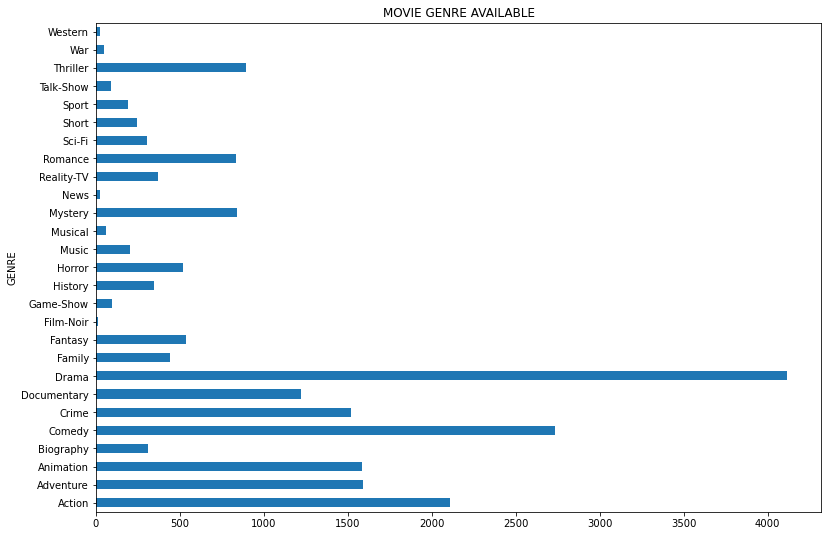

In [ ]:
df.iloc[:, 7:].sum().plot.barh(xlabel="GENRE", ylabel="Total",figsize=(13,9), title = "MOVIE GENRE AVAILABLE")

In [ ]:
movies.sort_values(by = "YEAR", ascending=False)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
9273,Astérix,2023,"[Animation, Action, Adventure]",0.0,Add a Plot,,0,0.0
3313,The Monkey King,2023,"[Animation, Action, Adventure]",0.0,An animated version of the mythical Chinese hero.,Director:Anthony Stacchi| Stars:BD Won...,0,0.0
1944,The Mother,2022,"[Action, Thriller]",0.0,Female-led action thriller.,Director:Niki Caro| Star:Jennifer Lopez,0,0.0
4854,Hiyama Kentarô no ninshin,2022,"[Comedy, Drama, Romance]",0.0,The story takes place in a world where-in rare...,"Stars:Takumi Saitoh, Juri Ueno",0,0.0
5123,Bulbul Tarang,2022,"[Comedy, Drama, Romance]",0.0,A bride tries to fight against the rules once ...,Director:Shree Narayan Singh| Stars:So...,0,0.0
...,...,...,...,...,...,...,...,...
3854,The Formula,0,"[Crime, Drama, Sport]",0.0,Follow a Formula One racing prodigy who is for...,Director:Gerard McMurray| Stars:Robert...,0,0.0
3833,Family Leave,0,[Comedy],0.0,The Brenners wake up to a full family body swi...,Star:Jennifer Garner,0,0.0
3800,Carmen Sandiego,0,"[Action, Adventure, Family]",0.0,A live-action feature film based on Carmen San...,Star:Gina Rodriguez,0,0.0
3774,The Chronicles of Narnia: The Magician's Nephew,0,"[Action, Adventure, Fantasy]",0.0,"The next installment of C.S. Lewis's ""Chronicl...",,0,0.0


In [ ]:
print(movies.sort_values(by = "YEAR", ascending=False).groupby("YEAR").mean()["RATING"])

YEAR
0       0.000000
1932    6.550000
1933    5.400000
1938    5.200000
1941    7.200000
          ...   
2019    6.836562
2020    6.303232
2021    4.833978
2022    0.000000
2023    0.000000
Name: RATING, Length: 79, dtype: float64


In [ ]:
df.loc[df["YEAR"] == 2000]

,MOVIES,YEAR,RATING,ONE-LINE,STARS,VOTES,RunTime,Action,Adventure,Animation,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
80,Gilmore Girls,2000,8.1,A dramedy centering around the relationship be...,"Stars:Lauren Graham, Alexis Bl...","106,650",44.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107,CSI: Crime Scene Investigation,2000,7.6,Series following an elite team of police foren...,"Stars:Laurence Fishburne, Marg...","78,589",60.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145,American Psycho,2000,7.6,A wealthy New York City investment banking exe...,Director:Mary Harron| Stars:Christian ...,"517,014",101.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
616,The Emperor's New Groove,2000,7.4,Emperor Kuzco is turned into a llama by his ex...,Director:Mark Dindal| Stars:David Spad...,"187,523",78.0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1131,Inuyasha,2000,7.9,A teenage girl periodically travels back in ti...,"Stars:Kappei Yamaguchi, Richar...","15,149",24.0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2204,Power Rangers Megaforce,2000,5.7,An evil galactic armada has come to destroy th...,"Stars:Andrew Gray, Ciara Hanna...","1,495",24.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3345,Paranoid,2000,4.0,"A fashion model, living in London, attends a d...",Director:John Duigan| Stars:Jessica Al...,"2,253",93.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3988,Petualangan Sherina,2000,7.8,Adventure of a little girl who just moved to a...,Director:Riri Riza| Stars:Sherina Muna...,756,112.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6275,Graffiti Verité 3: A Voyage Into the Iconograp...,2000,0.0,This experimental musical opus probes the soci...,"Director:Bob Bryan| Stars:Bruin, Chaz,...",0,54.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6305,Magic 4 Morons,2000,0.0,Magic 4 Morons teaches the viewer 10 amazing m...,Director:Rick Pamplin| Stars:Eric Mile...,0,60.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:title={'center':'AVERAGE OF MOVIE RATING FROM 2011-2021'}, xlabel='YEAR', ylabel='RATING'>

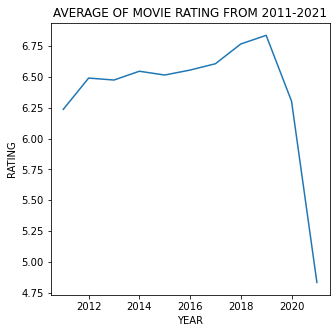

In [ ]:
df.loc[(df["YEAR"] >= 2011) & (df["YEAR"] <= 2021)].groupby("YEAR").mean()["RATING"].plot.line(ylabel="RATING",figsize=(5,5), title="AVERAGE OF MOVIE RATING FROM 2011-2021")

<AxesSubplot:title={'center':'AVERAGE OF MOVIE RATING FROM 2000-2010'}, xlabel='YEAR', ylabel='RATING'>

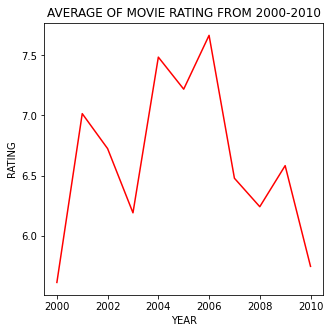

In [ ]:
df.loc[(df["YEAR"] >= 2000) & (df["YEAR"] <= 2010)].groupby("YEAR").mean()["RATING"].plot.line(ylabel="RATING",figsize=(5,5), color="red", title="AVERAGE OF MOVIE RATING FROM 2000-2010")

<AxesSubplot:title={'center':'AVERAGE OF MOVIE RATING FROM 1990-2000'}, xlabel='YEAR', ylabel='RATING'>

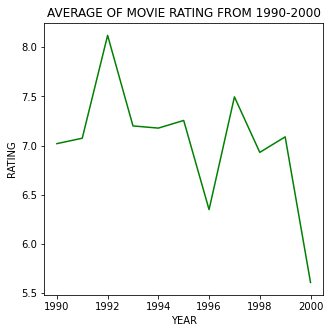

In [ ]:
df.loc[(df["YEAR"] >= 1990) & (df["YEAR"] <= 2000)].groupby("YEAR").mean()["RATING"].plot.line(ylabel="RATING",figsize=(5,5), color="green", title="AVERAGE OF MOVIE RATING FROM 1990-2000")

In [ ]:
!pip install --upgrade scipy

Requirement already up-to-date: scipy in c:\users\user\anaconda3\lib\site-packages (1.7.1)


In [ ]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
alpha = 0.05
mean_hipotesis = 7
# Default : Two Tailed
ztest , pval = stests.ztest(df.loc[(movies["YEAR"] >= 2011) & (movies["YEAR"] <= 2021)]["RATING"], movies.loc[(movies["YEAR"] >= 2000) & (df["YEAR"] <= 2010)]["RATING"], alternative = 'smaller')
print("H0: The mean of movie rating from 2011-2021 >= The mean of movie rating from 2000-2010")
print("H1: The mean of movie rating from 2011-2021 < The mean of movie rating from 2000-2010")
print("The alpha is ", alpha)
print("The p-value is ", float(pval))
if pval < alpha:
    print("H0 is rejected, therefore H1 is accepted")
else:
    print("H0 is accepted")

H0: The mean of movie rating from 2011-2021 >= The mean of movie rating from 2000-2010
H1: The mean of movie rating from 2011-2021 < The mean of movie rating from 2000-2010
The alpha is  0.05
The p-value is  4.3776506128224235e-09
H0 is rejected, therefore H1 is accepted


In [ ]:
df.loc[(df["YEAR"] >= 2011) & (df["YEAR"] <= 2021)]["RATING"]

0       6.1
1       5.0
3       9.2
4       0.0
5       7.6
       ... 
9483    0.0
9484    0.0
9486    0.0
9488    0.0
9489    0.0
Name: RATING, Length: 7845, dtype: float64

In [ ]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
alpha = 0.05
mean_hipotesis = 120
# Default : Two Tailed
ztest , pval = stests.ztest(df.loc[(df["YEAR"] >= 2011) & (df["YEAR"] <= 2021)]["RunTime"], value = mean_hipotesis, alternative = 'larger')
print("H0: The mean of movie RunTime from 2011-2021 <= 120 min")
print("H1: The mean of movie RunTime from 2011-2021 > 120 min")
print("The alpha is ", alpha)
print("The p-value is ", float(pval))
if pval < alpha:
    print("H0 is rejected, therefore H1 is accepted")
else:
    print("H0 is accepted")

H0: The mean of movie RunTime from 2011-2021 <= 120 min
H1: The mean of movie RunTime from 2011-2021 > 120 min
The alpha is  0.05
The p-value is  1.0
H0 is accepted


In [ ]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
alpha = 0.05
mean_hipotesis = 120
# Default : Two Tailed
ztest , pval = stests.ztest(df.loc[(df["YEAR"] >= 2000) & (df["YEAR"] <= 2010)]["RunTime"], value = mean_hipotesis, alternative = 'larger')
print("H0: The mean of movie RunTime from 2000-2010 <= 120 min")
print("H1: The mean of movie RunTime from 2000-2010 > 120 min")
print("The alpha is ", alpha)
print("The p-value is ", float(pval))
if pval < alpha:
    print("H0 is rejected, therefore H1 is accepted")
else:
    print("H0 is accepted")

H0: The mean of movie RunTime from 2000-2010 <= 120 min
H1: The mean of movie RunTime from 2000-2010 > 120 min
The alpha is  0.05
The p-value is  1.0
H0 is accepted


In [ ]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
alpha = 0.05
mean_hipotesis = 120
# Default : Two Tailed
ztest , pval = stests.ztest(df.loc[(df["YEAR"] >= 1900) & (df["YEAR"] <= 1990)]["RunTime"], value = mean_hipotesis, alternative = 'smaller')
print("H0: The mean of movie RunTime from 1900s-1990s >= 120 min")
print("H1: The mean of movie RunTime from 1900s-1990s < 120 min")
print("The alpha is ", alpha)
print("The p-value is ", float(pval))
if pval < alpha:
    print("H0 is rejected, therefore H1 is accepted")
else:
    print("H0 is accepted")

H0: The mean of movie RunTime from 1900s-1990s >= 120 min
H1: The mean of movie RunTime from 1900s-1990s < 120 min
The alpha is  0.05
The p-value is  4.5831009158792664e-15
H0 is rejected, therefore H1 is accepted


In [ ]:
print("Descriptive Statistics of column 'RATING'")
df["RATING"].describe()

Descriptive Statistics of column 'RATING'


count    9490.000000
mean        5.948145
std         2.657227
min         0.000000
25%         5.500000
50%         6.800000
75%         7.600000
max         9.900000
Name: RATING, dtype: float64

In [ ]:
print("Descriptive Statistics of column 'RunTime'")
df["RunTime"].describe()

Descriptive Statistics of column 'RunTime'


count    9490.000000
mean       50.781981
std        50.666680
min         0.000000
25%         0.000000
50%        43.000000
75%        87.000000
max       853.000000
Name: RunTime, dtype: float64

In [ ]:
df.iloc[:, 7:].sum()

Action         2110
Adventure      1588
Animation      1584
Biography       311
Comedy         2736
Crime          1519
Documentary    1221
Drama          4115
Family          442
Fantasy         537
Film-Noir        12
Game-Show        98
History         346
Horror          518
Music           200
Musical          61
Mystery         840
News             23
Reality-TV      370
Romance         835
Sci-Fi          303
Short           247
Sport           192
Talk-Show        89
Thriller        895
War              48
Western          24
dtype: int64

# **Conclusion**
* In brief, this “MOVIES DATASET FOR FEATURE EXTRACTION, PREDICTION” is very dirty in having missing values, duplicated data, and inconsistent datatype, especially in mixed datatype, such as number and string in a row of data. 
* After some pre-processing, I have a cleaned and prepared dataset to be analysed in future projects in regression and classification. However, as I have found before, I have set the missing values as zero (“0”) values. In the future, they can be replaced by their true values for better analysis and prediction.
* Therefore, I hope that some additional data are required to replace that zero values can be added soon by extracting data from the available source (Netflix/IMDB).